In [4]:
from google.colab import drive
drive.mount('/content/drive')
!pip install fuel
!pip install picklable_itertools

%matplotlib inline
%reload_ext autoreload
%autoreload 2


PROJECT_DIR = "/content/drive/My Drive/2019/testing/oc-nn/"


import sys,os
import numpy as np
sys.path.append(PROJECT_DIR)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **RCAE-MNIST 9_Vs_all** 

RCAE.RESULT_PATH: /content/drive/My Drive/2019/testing/oc-nn//reports/figures/MNIST/RCAE/
INFO: The dataset is  mnist
Inside the MNIST_DataLoader RCAE.RESULT_PATH: /content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks//reports/figures/MNIST/RCAE/
[INFO: ] Loading data...
[INFO:] The  label  of normal points are  0
[INFO:] Random Seed used is   42
[INFO: ] Data loaded.
[INFO:] Assertions of memory muted
Inside the MNIST_DataLoader RCAE.RESULT_PATH: /content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks//reports/figures/MNIST/RCAE/
[INFO: ] Loading data...
[INFO:] The  label  of normal points are  0
[INFO:] Random Seed used is   42
[INFO: ] Data loaded.
Train Data Shape:  (4986, 28, 28, 1)
Train Label Shape:  (4986,)
Validation Data Shape:  (997, 28, 28, 1)
Validation Label Shape:  (997,)
Test Data Shape:  (10000, 28, 28, 1)
Test Label Shape:  (10000,)
===========TRAINING AND PREDICTING WITH DCAE============================
[INFO: ] Shape of One C

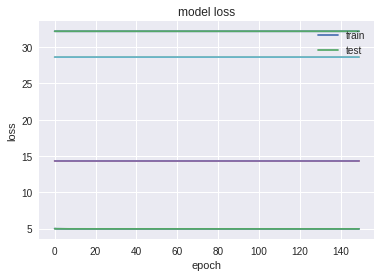

In [5]:
%reload_ext autoreload
%autoreload 2
from src.models.RCAE import RCAE_AD
import numpy as np 
from src.config import Configuration as Cfg

DATASET = "mnist"
IMG_DIM= 784
IMG_HGT =28
IMG_WDT=28
IMG_CHANNEL=1
HIDDEN_LAYER_SIZE= 32
MODEL_SAVE_PATH = PROJECT_DIR + "/models/MNIST/RCAE/"
REPORT_SAVE_PATH = PROJECT_DIR + "/reports/figures/MNIST/RCAE/"
PRETRAINED_WT_PATH = ""
# RANDOM_SEED = [42,56,81,67,33,25,90,77,15,11]
RANDOM_SEED = [42]
AUC = []

for seed in RANDOM_SEED:  
  Cfg.seed = seed
  rcae = RCAE_AD(DATASET,IMG_DIM, HIDDEN_LAYER_SIZE, IMG_HGT, IMG_WDT,IMG_CHANNEL, MODEL_SAVE_PATH, REPORT_SAVE_PATH,PRETRAINED_WT_PATH,seed)
  print("Train Data Shape: ",rcae.data._X_train.shape)
  print("Train Label Shape: ",rcae.data._y_train.shape)
  print("Validation Data Shape: ",rcae.data._X_val.shape)
  print("Validation Label Shape: ",rcae.data._y_val.shape)
  print("Test Data Shape: ",rcae.data._X_test.shape)
  print("Test Label Shape: ",rcae.data._y_test.shape)
  print("===========TRAINING AND PREDICTING WITH DCAE============================")
  auc_roc = rcae.fit_and_predict()
  print("========================================================================")
  AUC.append(auc_roc)
  
print("===========TRAINING AND PREDICTING WITH DCAE============================")
print("AUROC computed ", AUC)
auc_roc_mean = np.mean(np.asarray(AUC))
auc_roc_std = np.std(np.asarray(AUC))
print ("AUROC =====", auc_roc_mean ,"+/-",auc_roc_std)
print("========================================================================")

# **RCAE-MNIST 7_Vs_all** 

Using TensorFlow backend.
/content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks/src/utils/visualization/mosaic_plot.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 477, in start
    io

RCAE.RESULT_PATH: /content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks//reports/figures/MNIST/RCAE/
Inside the MNIST_DataLoader RCAE.RESULT_PATH: /content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks//reports/figures/MNIST/RCAE/
[INFO: ] Loading data...
[INFO:] The  label  of normal points are  7
[INFO:] THe shape of X is  (60000, 28, 28, 1)
[INFO:] THe shape of y is  (60000,)
[INFO] : The idx_normal is:  [False False False ... False False False]
[INFO] : The idx_outlier is:  [ True  True  True ...  True  True  True]
[INFO] : The shape of X is:  (60000, 28, 28, 1)
[INFO] : The shape of y is:  (60000,)
[INFO:] Random Seed used is   42
[INFO:] THe shape of X is  (10000, 28, 28, 1)
[INFO:] THe shape of y is  (10000,)
[INFO] : The idx_normal is:  [ True False False ... False False False]
[INFO] : The idx_outlier is:  [False  True  True ...  True  True  True]
[INFO] : The shape of X is:  (10000, 28, 28, 1)
[INFO] : The shape of y is:  (10000,)
[INF

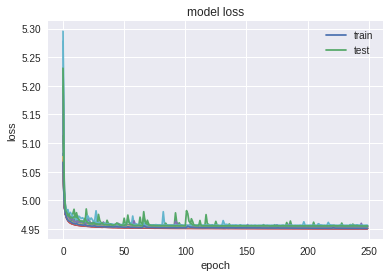

In [0]:
from src.models.RCAE import RCAE_AD
import numpy as np 
from src.config import Configuration as Cfg

DATASET = "mnist"
IMG_DIM= 784
IMG_HGT =28
IMG_WDT=28
IMG_CHANNEL=1
HIDDEN_LAYER_SIZE= 32
MODEL_SAVE_PATH = PROJECT_DIR + "/models/MNIST/RCAE/"
REPORT_SAVE_PATH = PROJECT_DIR + "/reports/figures/MNIST/RCAE/"
PRETRAINED_WT_PATH = ""
RANDOM_SEED = [42,56,81,67,33,25,90,77,15,11]
AUC = []

for seed in RANDOM_SEED:  
  Cfg.seed = seed
  rcae = RCAE_AD(DATASET,IMG_DIM, HIDDEN_LAYER_SIZE, IMG_HGT, IMG_WDT,IMG_CHANNEL, MODEL_SAVE_PATH, REPORT_SAVE_PATH,PRETRAINED_WT_PATH,seed)
  print("Train Data Shape: ",rcae.data._X_train.shape)
  print("Train Label Shape: ",rcae.data._y_train.shape)
  print("Validation Data Shape: ",rcae.data._X_val.shape)
  print("Validation Label Shape: ",rcae.data._y_val.shape)
  print("Test Data Shape: ",rcae.data._X_test.shape)
  print("Test Label Shape: ",rcae.data._y_test.shape)
  print("===========TRAINING AND PREDICTING WITH DCAE============================")
  auc_roc = rcae.fit_and_predict()
  print("========================================================================")
  AUC.append(auc_roc)
  
print("===========TRAINING AND PREDICTING WITH DCAE============================")
print("AUROC computed ", AUC)
auc_roc_mean = np.mean(np.asarray(AUC))
auc_roc_std = np.std(np.asarray(AUC))
print ("AUROC =====", auc_roc_mean ,"+/-",auc_roc_std)
print("========================================================================")

# **RCAE-MNIST 8_Vs_all**

RCAE.RESULT_PATH: /content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks//reports/figures/MNIST/RCAE/
Inside the MNIST_DataLoader RCAE.RESULT_PATH: /content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks//reports/figures/MNIST/RCAE/
[INFO: ] Loading data...
[INFO:] The  label  of normal points are  8
[INFO:] THe shape of X is  (60000, 28, 28, 1)
[INFO:] THe shape of y is  (60000,)
[INFO] : The idx_normal is:  [False False False ... False False  True]
[INFO] : The idx_outlier is:  [ True  True  True ...  True  True False]
[INFO] : The shape of X is:  (60000, 28, 28, 1)
[INFO] : The shape of y is:  (60000,)
[INFO:] Random Seed used is   42
[INFO:] THe shape of X is  (10000, 28, 28, 1)
[INFO:] THe shape of y is  (10000,)
[INFO] : The idx_normal is:  [False False False ... False False False]
[INFO] : The idx_outlier is:  [ True  True  True ...  True  True  True]
[INFO] : The shape of X is:  (10000, 28, 28, 1)
[INFO] : The shape of y is:  (10000,)
[INF

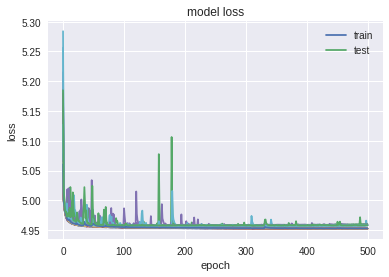

In [0]:
from src.models.RCAE import RCAE_AD
import numpy as np 
from src.config import Configuration as Cfg

DATASET = "mnist"
IMG_DIM= 784
IMG_HGT =28
IMG_WDT=28
IMG_CHANNEL=1
HIDDEN_LAYER_SIZE= 32
MODEL_SAVE_PATH = PROJECT_DIR + "/models/MNIST/RCAE/"
REPORT_SAVE_PATH = PROJECT_DIR + "/reports/figures/MNIST/RCAE/"
PRETRAINED_WT_PATH = ""
RANDOM_SEED = [42,56,81,67,33,25,90,77,15,11]
AUC = []

for seed in RANDOM_SEED:  
  Cfg.seed = seed
  rcae = RCAE_AD(DATASET,IMG_DIM, HIDDEN_LAYER_SIZE, IMG_HGT, IMG_WDT,IMG_CHANNEL, MODEL_SAVE_PATH, REPORT_SAVE_PATH,PRETRAINED_WT_PATH,seed)
  print("Train Data Shape: ",rcae.data._X_train.shape)
  print("Train Label Shape: ",rcae.data._y_train.shape)
  print("Validation Data Shape: ",rcae.data._X_val.shape)
  print("Validation Label Shape: ",rcae.data._y_val.shape)
  print("Test Data Shape: ",rcae.data._X_test.shape)
  print("Test Label Shape: ",rcae.data._y_test.shape)
  print("===========TRAINING AND PREDICTING WITH DCAE============================")
  auc_roc = rcae.fit_and_predict()
  print("========================================================================")
  AUC.append(auc_roc)
  
print("===========TRAINING AND PREDICTING WITH DCAE============================")
print("AUROC computed ", AUC)
auc_roc_mean = np.mean(np.asarray(AUC))
auc_roc_std = np.std(np.asarray(AUC))
print ("AUROC =====", auc_roc_mean ,"+/-",auc_roc_std)
print("========================================================================")

# **RCAE-MNIST 6_Vs_all**

In [0]:
from src.models.RCAE import RCAE_AD
import numpy as np 
from src.config import Configuration as Cfg

DATASET = "mnist"
IMG_DIM= 784
IMG_HGT =28
IMG_WDT=28
IMG_CHANNEL=1
HIDDEN_LAYER_SIZE= 32
MODEL_SAVE_PATH = PROJECT_DIR + "/models/MNIST/RCAE/"
REPORT_SAVE_PATH = PROJECT_DIR + "/reports/figures/MNIST/RCAE/"
PRETRAINED_WT_PATH = ""
RANDOM_SEED = [42,56,81,67,33,25,90,77,15,11]
AUC = []

for seed in RANDOM_SEED:  
  Cfg.seed = seed
  rcae = RCAE_AD(DATASET,IMG_DIM, HIDDEN_LAYER_SIZE, IMG_HGT, IMG_WDT,IMG_CHANNEL, MODEL_SAVE_PATH, REPORT_SAVE_PATH,PRETRAINED_WT_PATH,seed)
  print("Train Data Shape: ",rcae.data._X_train.shape)
  print("Train Label Shape: ",rcae.data._y_train.shape)
  print("Validation Data Shape: ",rcae.data._X_val.shape)
  print("Validation Label Shape: ",rcae.data._y_val.shape)
  print("Test Data Shape: ",rcae.data._X_test.shape)
  print("Test Label Shape: ",rcae.data._y_test.shape)
  print("===========TRAINING AND PREDICTING WITH DCAE============================")
  auc_roc = rcae.fit_and_predict()
  print("========================================================================")
  AUC.append(auc_roc)
  
print("===========TRAINING AND PREDICTING WITH DCAE============================")
print("AUROC computed ", AUC)
auc_roc_mean = np.mean(np.asarray(AUC))
auc_roc_std = np.std(np.asarray(AUC))
print ("AUROC =====", auc_roc_mean ,"+/-",auc_roc_std)
print("========================================================================")

Using TensorFlow backend.
/content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks/src/utils/visualization/mosaic_plot.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 477, in start
    io

RCAE.RESULT_PATH: /content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks//reports/figures/MNIST/RCAE/
Inside the MNIST_DataLoader RCAE.RESULT_PATH: /content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks//reports/figures/MNIST/RCAE/
[INFO: ] Loading data...
[INFO:] The  label  of normal points are  6
[INFO:] THe shape of X is  (60000, 28, 28, 1)
[INFO:] THe shape of y is  (60000,)
[INFO] : The idx_normal is:  [False False False ... False  True False]
[INFO] : The idx_outlier is:  [ True  True  True ...  True False  True]
[INFO] : The shape of X is:  (60000, 28, 28, 1)
[INFO] : The shape of y is:  (60000,)
[INFO:] Random Seed used is   42
[INFO:] THe shape of X is  (10000, 28, 28, 1)
[INFO:] THe shape of y is  (10000,)
[INFO] : The idx_normal is:  [False False False ... False False  True]
[INFO] : The idx_outlier is:  [ True  True  True ...  True  True False]
[INFO] : The shape of X is:  (10000, 28, 28, 1)
[INFO] : The shape of y is:  (10000,)
[INF

# **RCAE-MNIST 5_Vs_all**

Using TensorFlow backend.
/content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks/src/utils/visualization/mosaic_plot.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 477, in start
    io

RCAE.RESULT_PATH: /content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks//reports/figures/MNIST/RCAE/
Inside the MNIST_DataLoader RCAE.RESULT_PATH: /content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks//reports/figures/MNIST/RCAE/
[INFO: ] Loading data...
[INFO:] The  label  of normal points are  5
[INFO:] THe shape of X is  (60000, 28, 28, 1)
[INFO:] THe shape of y is  (60000,)
[INFO] : The idx_normal is:  [ True False False ...  True False False]
[INFO] : The idx_outlier is:  [False  True  True ... False  True  True]
[INFO] : The shape of X is:  (60000, 28, 28, 1)
[INFO] : The shape of y is:  (60000,)
[INFO:] Random Seed used is   42
[INFO:] THe shape of X is  (10000, 28, 28, 1)
[INFO:] THe shape of y is  (10000,)
[INFO] : The idx_normal is:  [False False False ... False  True False]
[INFO] : The idx_outlier is:  [ True  True  True ...  True False  True]
[INFO] : The shape of X is:  (10000, 28, 28, 1)
[INFO] : The shape of y is:  (10000,)
[INF

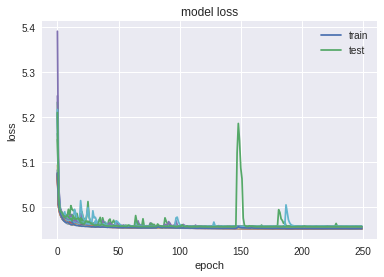

In [0]:
from src.models.RCAE import RCAE_AD
import numpy as np 
from src.config import Configuration as Cfg

DATASET = "mnist"
IMG_DIM= 784
IMG_HGT =28
IMG_WDT=28
IMG_CHANNEL=1
HIDDEN_LAYER_SIZE= 32
MODEL_SAVE_PATH = PROJECT_DIR + "/models/MNIST/RCAE/"
REPORT_SAVE_PATH = PROJECT_DIR + "/reports/figures/MNIST/RCAE/"
PRETRAINED_WT_PATH = ""
RANDOM_SEED = [42,56,81,67,33,25,90,77,15,11]
AUC = []

for seed in RANDOM_SEED:  
  Cfg.seed = seed
  rcae = RCAE_AD(DATASET,IMG_DIM, HIDDEN_LAYER_SIZE, IMG_HGT, IMG_WDT,IMG_CHANNEL, MODEL_SAVE_PATH, REPORT_SAVE_PATH,PRETRAINED_WT_PATH,seed)
  print("Train Data Shape: ",rcae.data._X_train.shape)
  print("Train Label Shape: ",rcae.data._y_train.shape)
  print("Validation Data Shape: ",rcae.data._X_val.shape)
  print("Validation Label Shape: ",rcae.data._y_val.shape)
  print("Test Data Shape: ",rcae.data._X_test.shape)
  print("Test Label Shape: ",rcae.data._y_test.shape)
  print("===========TRAINING AND PREDICTING WITH DCAE============================")
  auc_roc = rcae.fit_and_predict()
  print("========================================================================")
  AUC.append(auc_roc)
  
print("===========TRAINING AND PREDICTING WITH DCAE============================")
print("AUROC computed ", AUC)
auc_roc_mean = np.mean(np.asarray(AUC))
auc_roc_std = np.std(np.asarray(AUC))
print ("AUROC =====", auc_roc_mean ,"+/-",auc_roc_std)
print("========================================================================")

# **RCAE-MNIST 4_Vs_all**

Using TensorFlow backend.
/content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks/src/utils/visualization/mosaic_plot.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 477, in start
    io

RCAE.RESULT_PATH: /content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks//reports/figures/MNIST/RCAE/
Inside the MNIST_DataLoader RCAE.RESULT_PATH: /content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks//reports/figures/MNIST/RCAE/
[INFO: ] Loading data...
[INFO:] The  label  of normal points are  4
[INFO:] THe shape of X is  (60000, 28, 28, 1)
[INFO:] THe shape of y is  (60000,)
[INFO] : The idx_normal is:  [False False  True ... False False False]
[INFO] : The idx_outlier is:  [ True  True False ...  True  True  True]
[INFO] : The shape of X is:  (60000, 28, 28, 1)
[INFO] : The shape of y is:  (60000,)
[INFO:] Random Seed used is   42
[INFO:] THe shape of X is  (10000, 28, 28, 1)
[INFO:] THe shape of y is  (10000,)
[INFO] : The idx_normal is:  [False False False ...  True False False]
[INFO] : The idx_outlier is:  [ True  True  True ... False  True  True]
[INFO] : The shape of X is:  (10000, 28, 28, 1)
[INFO] : The shape of y is:  (10000,)
[INF

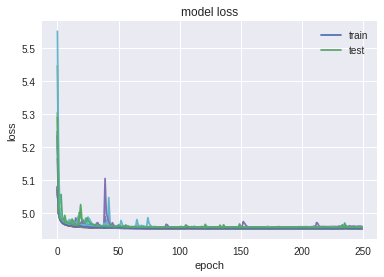

In [0]:
from src.models.RCAE import RCAE_AD
import numpy as np 
from src.config import Configuration as Cfg

DATASET = "mnist"
IMG_DIM= 784
IMG_HGT =28
IMG_WDT=28
IMG_CHANNEL=1
HIDDEN_LAYER_SIZE= 32
MODEL_SAVE_PATH = PROJECT_DIR + "/models/MNIST/RCAE/"
REPORT_SAVE_PATH = PROJECT_DIR + "/reports/figures/MNIST/RCAE/"
PRETRAINED_WT_PATH = ""
RANDOM_SEED = [42,56,81,67,33,25,90,77,15,11]
AUC = []

for seed in RANDOM_SEED:  
  Cfg.seed = seed
  rcae = RCAE_AD(DATASET,IMG_DIM, HIDDEN_LAYER_SIZE, IMG_HGT, IMG_WDT,IMG_CHANNEL, MODEL_SAVE_PATH, REPORT_SAVE_PATH,PRETRAINED_WT_PATH,seed)
  print("Train Data Shape: ",rcae.data._X_train.shape)
  print("Train Label Shape: ",rcae.data._y_train.shape)
  print("Validation Data Shape: ",rcae.data._X_val.shape)
  print("Validation Label Shape: ",rcae.data._y_val.shape)
  print("Test Data Shape: ",rcae.data._X_test.shape)
  print("Test Label Shape: ",rcae.data._y_test.shape)
  print("===========TRAINING AND PREDICTING WITH DCAE============================")
  auc_roc = rcae.fit_and_predict()
  print("========================================================================")
  AUC.append(auc_roc)
  
print("===========TRAINING AND PREDICTING WITH DCAE============================")
print("AUROC computed ", AUC)
auc_roc_mean = np.mean(np.asarray(AUC))
auc_roc_std = np.std(np.asarray(AUC))
print ("AUROC =====", auc_roc_mean ,"+/-",auc_roc_std)
print("========================================================================")

# **RCAE-MNIST 3_Vs_all**

Using TensorFlow backend.
/content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks/src/utils/visualization/mosaic_plot.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 477, in start
    io

RCAE.RESULT_PATH: /content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks//reports/figures/MNIST/RCAE/
Inside the MNIST_DataLoader RCAE.RESULT_PATH: /content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks//reports/figures/MNIST/RCAE/
[INFO: ] Loading data...
[INFO:] The  label  of normal points are  3
[INFO:] THe shape of X is  (60000, 28, 28, 1)
[INFO:] THe shape of y is  (60000,)
[INFO] : The idx_normal is:  [False False False ... False False False]
[INFO] : The idx_outlier is:  [ True  True  True ...  True  True  True]
[INFO] : The shape of X is:  (60000, 28, 28, 1)
[INFO] : The shape of y is:  (60000,)
[INFO:] Random Seed used is   42
[INFO:] THe shape of X is  (10000, 28, 28, 1)
[INFO:] THe shape of y is  (10000,)
[INFO] : The idx_normal is:  [False False False ... False False False]
[INFO] : The idx_outlier is:  [ True  True  True ...  True  True  True]
[INFO] : The shape of X is:  (10000, 28, 28, 1)
[INFO] : The shape of y is:  (10000,)
[INF

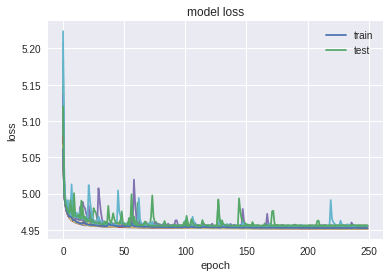

In [0]:
from src.models.RCAE import RCAE_AD
import numpy as np 
from src.config import Configuration as Cfg

DATASET = "mnist"
IMG_DIM= 784
IMG_HGT =28
IMG_WDT=28
IMG_CHANNEL=1
HIDDEN_LAYER_SIZE= 32
MODEL_SAVE_PATH = PROJECT_DIR + "/models/MNIST/RCAE/"
REPORT_SAVE_PATH = PROJECT_DIR + "/reports/figures/MNIST/RCAE/"
PRETRAINED_WT_PATH = ""
RANDOM_SEED = [42,56,81,67,33,25,90,77,15,11]
AUC = []

for seed in RANDOM_SEED:  
  Cfg.seed = seed
  rcae = RCAE_AD(DATASET,IMG_DIM, HIDDEN_LAYER_SIZE, IMG_HGT, IMG_WDT,IMG_CHANNEL, MODEL_SAVE_PATH, REPORT_SAVE_PATH,PRETRAINED_WT_PATH,seed)
  print("Train Data Shape: ",rcae.data._X_train.shape)
  print("Train Label Shape: ",rcae.data._y_train.shape)
  print("Validation Data Shape: ",rcae.data._X_val.shape)
  print("Validation Label Shape: ",rcae.data._y_val.shape)
  print("Test Data Shape: ",rcae.data._X_test.shape)
  print("Test Label Shape: ",rcae.data._y_test.shape)
  print("===========TRAINING AND PREDICTING WITH DCAE============================")
  auc_roc = rcae.fit_and_predict()
  print("========================================================================")
  AUC.append(auc_roc)
  
print("===========TRAINING AND PREDICTING WITH DCAE============================")
print("AUROC computed ", AUC)
auc_roc_mean = np.mean(np.asarray(AUC))
auc_roc_std = np.std(np.asarray(AUC))
print ("AUROC =====", auc_roc_mean ,"+/-",auc_roc_std)
print("========================================================================")

# **RCAE-MNIST 2_Vs_all**

Using TensorFlow backend.
/content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks/src/utils/visualization/mosaic_plot.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 477, in start
    io

RCAE.RESULT_PATH: /content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks//reports/figures/MNIST/RCAE/
Inside the MNIST_DataLoader RCAE.RESULT_PATH: /content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks//reports/figures/MNIST/RCAE/
[INFO: ] Loading data...
[INFO:] The  label  of normal points are  2
[INFO:] THe shape of X is  (60000, 28, 28, 1)
[INFO:] THe shape of y is  (60000,)
[INFO] : The idx_normal is:  [False False False ... False False False]
[INFO] : The idx_outlier is:  [ True  True  True ...  True  True  True]
[INFO] : The shape of X is:  (60000, 28, 28, 1)
[INFO] : The shape of y is:  (60000,)
[INFO:] Random Seed used is   42
[INFO:] THe shape of X is  (10000, 28, 28, 1)
[INFO:] THe shape of y is  (10000,)
[INFO] : The idx_normal is:  [False  True False ... False False False]
[INFO] : The idx_outlier is:  [ True False  True ...  True  True  True]
[INFO] : The shape of X is:  (10000, 28, 28, 1)
[INFO] : The shape of y is:  (10000,)
[INF

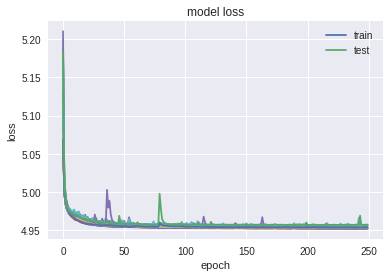

In [0]:
from src.models.RCAE import RCAE_AD
import numpy as np 
from src.config import Configuration as Cfg

DATASET = "mnist"
IMG_DIM= 784
IMG_HGT =28
IMG_WDT=28
IMG_CHANNEL=1
HIDDEN_LAYER_SIZE= 32
MODEL_SAVE_PATH = PROJECT_DIR + "/models/MNIST/RCAE/"
REPORT_SAVE_PATH = PROJECT_DIR + "/reports/figures/MNIST/RCAE/"
PRETRAINED_WT_PATH = ""
RANDOM_SEED = [42,56,81,67,33,25,90,77,15,11]
AUC = []

for seed in RANDOM_SEED:  
  Cfg.seed = seed
  rcae = RCAE_AD(DATASET,IMG_DIM, HIDDEN_LAYER_SIZE, IMG_HGT, IMG_WDT,IMG_CHANNEL, MODEL_SAVE_PATH, REPORT_SAVE_PATH,PRETRAINED_WT_PATH,seed)
  print("Train Data Shape: ",rcae.data._X_train.shape)
  print("Train Label Shape: ",rcae.data._y_train.shape)
  print("Validation Data Shape: ",rcae.data._X_val.shape)
  print("Validation Label Shape: ",rcae.data._y_val.shape)
  print("Test Data Shape: ",rcae.data._X_test.shape)
  print("Test Label Shape: ",rcae.data._y_test.shape)
  print("===========TRAINING AND PREDICTING WITH DCAE============================")
  auc_roc = rcae.fit_and_predict()
  print("========================================================================")
  AUC.append(auc_roc)
  
print("===========TRAINING AND PREDICTING WITH DCAE============================")
print("AUROC computed ", AUC)
auc_roc_mean = np.mean(np.asarray(AUC))
auc_roc_std = np.std(np.asarray(AUC))
print ("AUROC =====", auc_roc_mean ,"+/-",auc_roc_std)
print("========================================================================")

# **RCAE-MNIST 1_Vs_all**

In [0]:
from src.models.RCAE import RCAE_AD
import numpy as np 
from src.config import Configuration as Cfg

DATASET = "mnist"
IMG_DIM= 784
IMG_HGT =28
IMG_WDT=28
IMG_CHANNEL=1
HIDDEN_LAYER_SIZE= 32
MODEL_SAVE_PATH = PROJECT_DIR + "/models/MNIST/RCAE/"
REPORT_SAVE_PATH = PROJECT_DIR + "/reports/figures/MNIST/RCAE/"
PRETRAINED_WT_PATH = ""
RANDOM_SEED = [42,56,81,67,33,25,90,77,15,11]
AUC = []

for seed in RANDOM_SEED:  
  Cfg.seed = seed
  rcae = RCAE_AD(DATASET,IMG_DIM, HIDDEN_LAYER_SIZE, IMG_HGT, IMG_WDT,IMG_CHANNEL, MODEL_SAVE_PATH, REPORT_SAVE_PATH,PRETRAINED_WT_PATH,seed)
  print("Train Data Shape: ",rcae.data._X_train.shape)
  print("Train Label Shape: ",rcae.data._y_train.shape)
  print("Validation Data Shape: ",rcae.data._X_val.shape)
  print("Validation Label Shape: ",rcae.data._y_val.shape)
  print("Test Data Shape: ",rcae.data._X_test.shape)
  print("Test Label Shape: ",rcae.data._y_test.shape)
  print("===========TRAINING AND PREDICTING WITH DCAE============================")
  auc_roc = rcae.fit_and_predict()
  print("========================================================================")
  AUC.append(auc_roc)
  
print("===========TRAINING AND PREDICTING WITH DCAE============================")
print("AUROC computed ", AUC)
auc_roc_mean = np.mean(np.asarray(AUC))
auc_roc_std = np.std(np.asarray(AUC))
print ("AUROC =====", auc_roc_mean ,"+/-",auc_roc_std)
print("========================================================================")

Using TensorFlow backend.
/content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks/src/utils/visualization/mosaic_plot.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 477, in start
    io

RCAE.RESULT_PATH: /content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks//reports/figures/MNIST/RCAE/
Inside the MNIST_DataLoader RCAE.RESULT_PATH: /content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks//reports/figures/MNIST/RCAE/
[INFO: ] Loading data...
[INFO:] The  label  of normal points are  1
[INFO:] THe shape of X is  (60000, 28, 28, 1)
[INFO:] THe shape of y is  (60000,)
[INFO] : The idx_normal is:  [False False False ... False False False]
[INFO] : The idx_outlier is:  [ True  True  True ...  True  True  True]
[INFO] : The shape of X is:  (60000, 28, 28, 1)
[INFO] : The shape of y is:  (60000,)
[INFO:] Random Seed used is   42
[INFO:] THe shape of X is  (10000, 28, 28, 1)
[INFO:] THe shape of y is  (10000,)
[INFO] : The idx_normal is:  [False False  True ... False False False]
[INFO] : The idx_outlier is:  [ True  True False ...  True  True  True]
[INFO] : The shape of X is:  (10000, 28, 28, 1)
[INFO] : The shape of y is:  (10000,)
[INF

# **RCAE-MNIST 0_Vs_all**

Using TensorFlow backend.
/content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks/src/utils/visualization/mosaic_plot.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 477, in start
    io

RCAE.RESULT_PATH: /content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks//reports/figures/MNIST/RCAE/
Inside the MNIST_DataLoader RCAE.RESULT_PATH: /content/drive/My Drive/2018/Colab_Deep_Learning/one_class_neural_networks//reports/figures/MNIST/RCAE/
[INFO: ] Loading data...
[INFO:] The  label  of normal points are  0
[INFO:] THe shape of X is  (60000, 28, 28, 1)
[INFO:] THe shape of y is  (60000,)
[INFO] : The idx_normal is:  [False  True False ... False False False]
[INFO] : The idx_outlier is:  [ True False  True ...  True  True  True]
[INFO] : The shape of X is:  (60000, 28, 28, 1)
[INFO] : The shape of y is:  (60000,)
[INFO:] Random Seed used is   42
[INFO:] THe shape of X is  (10000, 28, 28, 1)
[INFO:] THe shape of y is  (10000,)
[INFO] : The idx_normal is:  [False False False ... False False False]
[INFO] : The idx_outlier is:  [ True  True  True ...  True  True  True]
[INFO] : The shape of X is:  (10000, 28, 28, 1)
[INFO] : The shape of y is:  (10000,)
[INF

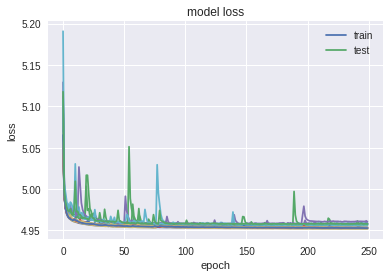

In [0]:
from src.models.RCAE import RCAE_AD
import numpy as np 
from src.config import Configuration as Cfg

DATASET = "mnist"
IMG_DIM= 784
IMG_HGT =28
IMG_WDT=28
IMG_CHANNEL=1
HIDDEN_LAYER_SIZE= 32
MODEL_SAVE_PATH = PROJECT_DIR + "/models/MNIST/RCAE/"
REPORT_SAVE_PATH = PROJECT_DIR + "/reports/figures/MNIST/RCAE/"
PRETRAINED_WT_PATH = ""
RANDOM_SEED = [42,56,81,67,33,25,90,77,15,11]
AUC = []

for seed in RANDOM_SEED:  
  Cfg.seed = seed
  rcae = RCAE_AD(DATASET,IMG_DIM, HIDDEN_LAYER_SIZE, IMG_HGT, IMG_WDT,IMG_CHANNEL, MODEL_SAVE_PATH, REPORT_SAVE_PATH,PRETRAINED_WT_PATH,seed)
  print("Train Data Shape: ",rcae.data._X_train.shape)
  print("Train Label Shape: ",rcae.data._y_train.shape)
  print("Validation Data Shape: ",rcae.data._X_val.shape)
  print("Validation Label Shape: ",rcae.data._y_val.shape)
  print("Test Data Shape: ",rcae.data._X_test.shape)
  print("Test Label Shape: ",rcae.data._y_test.shape)
  print("===========TRAINING AND PREDICTING WITH DCAE============================")
  auc_roc = rcae.fit_and_predict()
  print("========================================================================")
  AUC.append(auc_roc)
  
print("===========TRAINING AND PREDICTING WITH DCAE============================")
print("AUROC computed ", AUC)
auc_roc_mean = np.mean(np.asarray(AUC))
auc_roc_std = np.std(np.asarray(AUC))
print ("AUROC =====", auc_roc_mean ,"+/-",auc_roc_std)
print("========================================================================")

Produce Embeddings

### Pretrain Autoencoder